## Exploratory Data Analysis of Police Killings in USA

We will use the US Police Shootings Dataset(Kaggle) to gain insights and identify trends.It contains data from January 2015 to June 2020

This project aims to see if there is an evident history of racial bias towards the black community.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('shootings.csv')

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


We will pick each and every feature and try gaining valuable insights.

In [4]:
df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [5]:
df.shape

(4895, 15)

In [6]:
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

In [7]:
df.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

##### The dataset is clean with no null/empty values so we can proceed with the analysis.

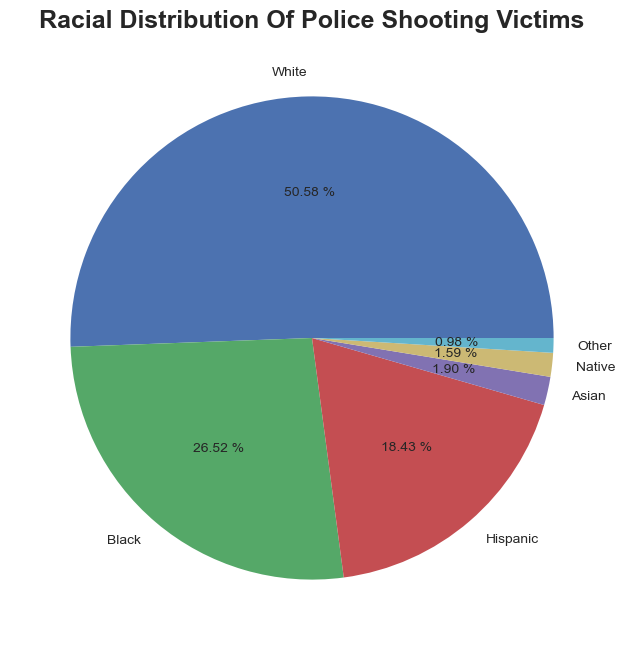

In [8]:
labels = ['White','Black','Hispanic','Asian','Native','Other']

plt.figure(figsize = (8,8) , dpi = 100)
plt.pie(df.race.value_counts(), labels = labels , autopct = '%.2f %%')

plt.title('Racial Distribution Of Police Shooting Victims', fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

Almost 27% victims of police shootings are black people. Only 13.4% of US population is Black so the higher percentage of killings show some racial bias.

In [9]:
df.race.value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

In [10]:
df.gender.value_counts()

M    4673
F     222
Name: gender, dtype: int64

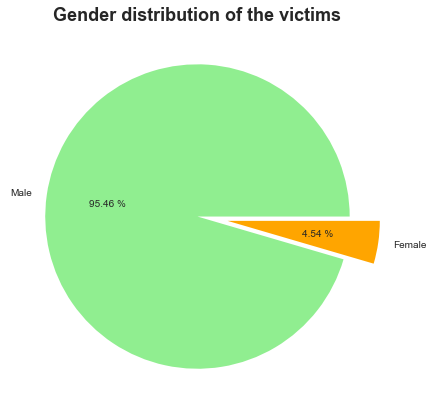

In [11]:
plt.figure(figsize=(7,7))
plt.pie(df.gender.value_counts() , autopct = '%.2f %%' , labels = ['Male' , 'Female'] , colors = ['lightgreen','orange'],
       explode = (0,0.2))
plt.title('Gender distribution of the victims' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

It is evidently seen the total count of Police killings is unevenly distributed, with a very high percentage of the victims being male.

In [12]:
df['age'].describe()

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

The mean age of the shooting victims is around 36-37 years.The minimum age recorded for a victim is 6 years which is very 
surprising at the least. No explanation can be provided for the killing of a child who is not even over 10.

In [13]:
df.loc[df['age'] == 6]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
811,980,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,White,Marksville,LA,False,other,Car,True,Unarmed
2761,3229,Kameron Prescott,2017-12-21,shot,unarmed,6.0,M,White,Schertz,TX,False,other,Not fleeing,False,Unarmed


There are two cases of the victim being 6 years old. The more surprising thing is both of the kids were unarmed so I don't see the logic behind shooting them. These are some highly disturbing findings.

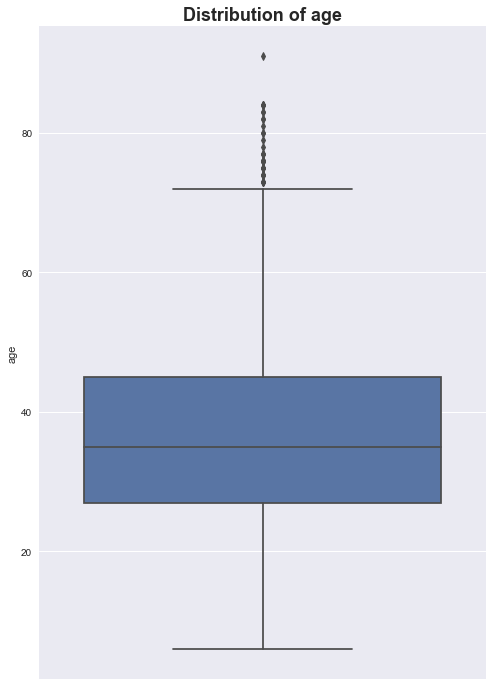

In [14]:
plt.figure(figsize = (8,12))
sns.boxplot(y = 'age' , data = df)
plt.title('Distribution of age', fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

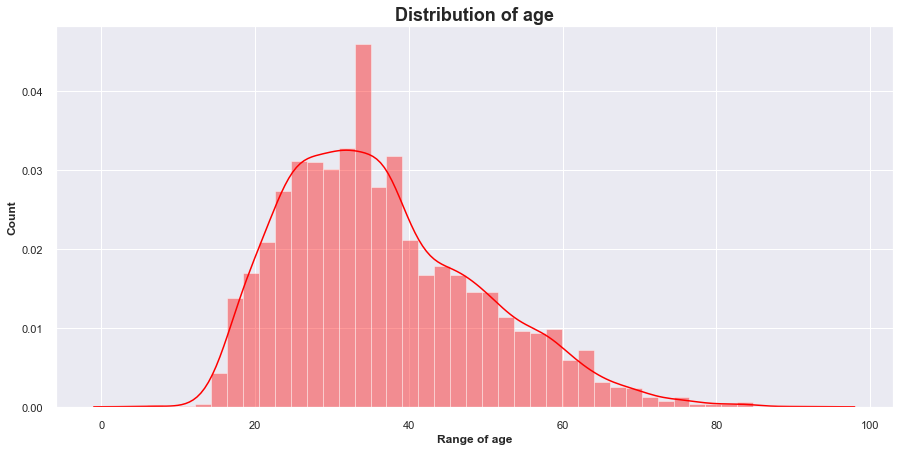

In [15]:
plt.figure(figsize = (15,7))
sns.set_theme(style="darkgrid")
sns.distplot(df['age'], color='red')
plt.title('Distribution of age', fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.xlabel('Range of age' , fontweight = 'bold')
plt.ylabel('Count',fontweight = 'bold')
plt.show()

As we can see, most individuals are between 25-40 years old with an average one being 36 Years old.

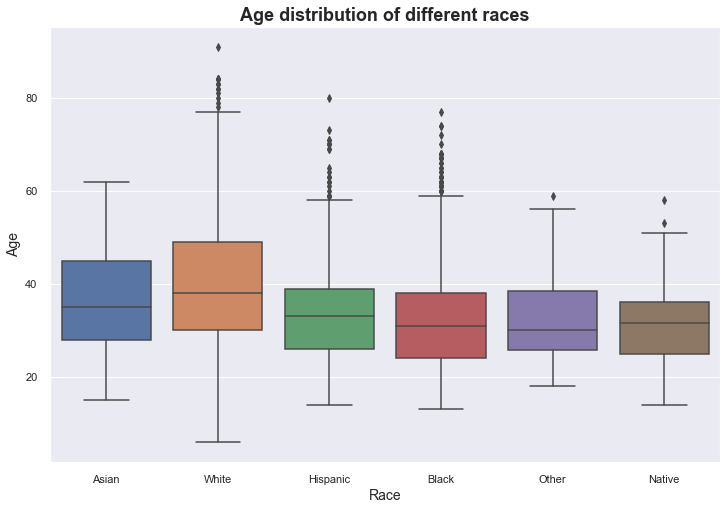

In [16]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "race" , y = "age" , data = df)
plt.title('Age distribution of different races' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.xlabel('Race' , fontsize = 14)
plt.ylabel('Age' , fontsize = 14)
plt.show()

In [17]:
def get_year(date):
    return date.split('-')[0]

df['year'] = df['date'].apply(lambda x: get_year(x))

df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015


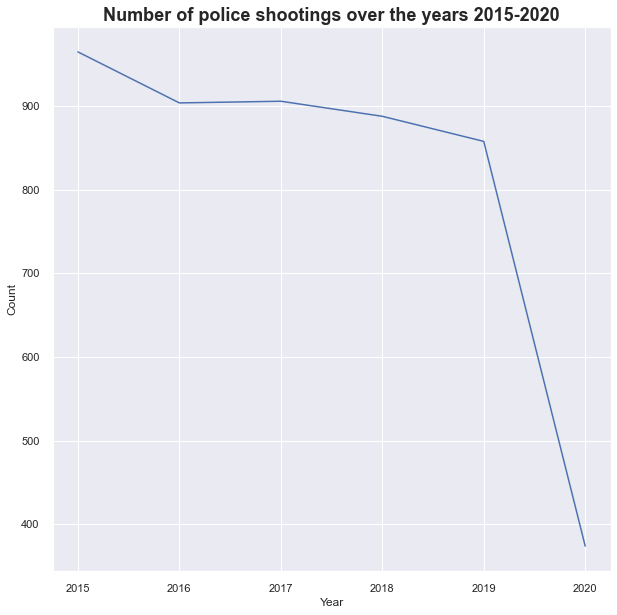

In [18]:
data = df.groupby(['year'])['name'].count().reset_index()
data.columns = ['Year', 'Count']
plt.figure(figsize = (10,10))
sns.set_theme(style="darkgrid")
sns.lineplot(data['Year'] , data['Count'])
plt.title('Number of police shootings over the years 2015-2020' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

We only have data upto 15th June of 2020, but it can be seen that for the years between 2015-2019 the police killings are on a decline.

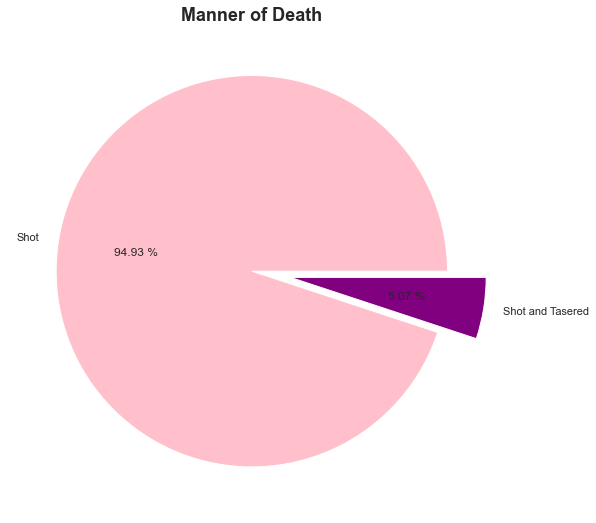

In [19]:
plt.figure(figsize=(9,9))
plt.pie(df.manner_of_death.value_counts() , autopct = '%.2f %%' , labels = ['Shot' , 'Shot and Tasered'] , 
        colors = ['pink','purple'], explode = (0,0.2))
plt.title('Manner of Death' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

This 5% of the graph shows the distribution of people that were shot and tasered. The whole point of tasering is to neutralise someone. Its hard to imagine shooting someone even after tasering them. It is really disturbing that the police has to resort to shooting even after using tasers.

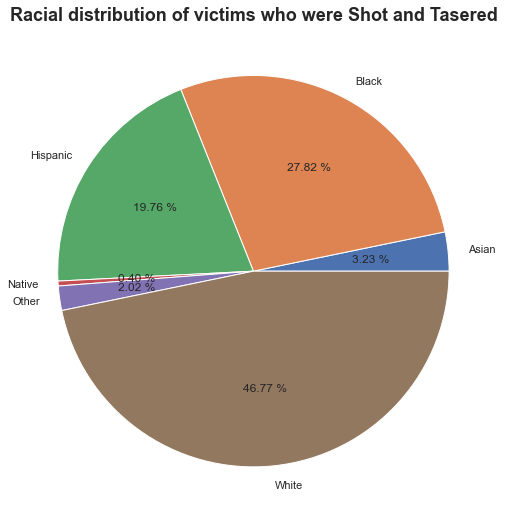

In [20]:
labels2 = np.unique(df.race)
arr = []
for i in labels2:
    og = df[df.manner_of_death == 'shot and Tasered']
    og = og[og.race == i]
    arr.append(og.shape[0])  
plt.figure(figsize = (9,9))
plt.pie(arr,labels = labels2,autopct = '%.2f %%')
plt.title("Racial distribution of victims who were Shot and Tasered" , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

Almost 28% of the shot and tasered victims are Black.

In [21]:
print(np.unique(df.armed))

['BB gun' 'BB gun and vehicle' 'Taser' 'air conditioner' 'air pistol' 'ax'
 'barstool' 'baseball bat' 'baseball bat and bottle'
 'baseball bat and fireplace poker' 'baseball bat and knife' 'baton'
 'bayonet' 'bean-bag gun' 'beer bottle' 'blunt object' 'bow and arrow'
 'box cutter' 'brick' 'car, knife and mace' 'carjack' 'chain' 'chain saw'
 'chainsaw' 'chair' "contractor's level" 'cordless drill' 'crossbow'
 'crowbar' 'fireworks' 'flagpole' 'flashlight' 'garden tool' 'glass shard'
 'grenade' 'gun' 'gun and car' 'gun and knife' 'gun and sword'
 'gun and vehicle' 'guns and explosives' 'hammer' 'hand torch' 'hatchet'
 'hatchet and gun' 'ice pick' 'incendiary device' 'knife'
 'lawn mower blade' 'machete' 'machete and gun' 'meat cleaver'
 'metal hand tool' 'metal object' 'metal pipe' 'metal pole' 'metal rake'
 'metal stick' 'motorcycle' 'nail gun' 'oar' 'pellet gun' 'pen'
 'pepper spray' 'pick-axe' 'piece of wood' 'pipe' 'pitchfork' 'pole'
 'pole and knife' 'rock' 'samurai sword' 'scissors'

The US Police Department have done a pretty good job of putting almost every possible weapon known to me on that list.This list contains some object that would barely qualify as a weapon.Let's look at the 25 most common weapons. 

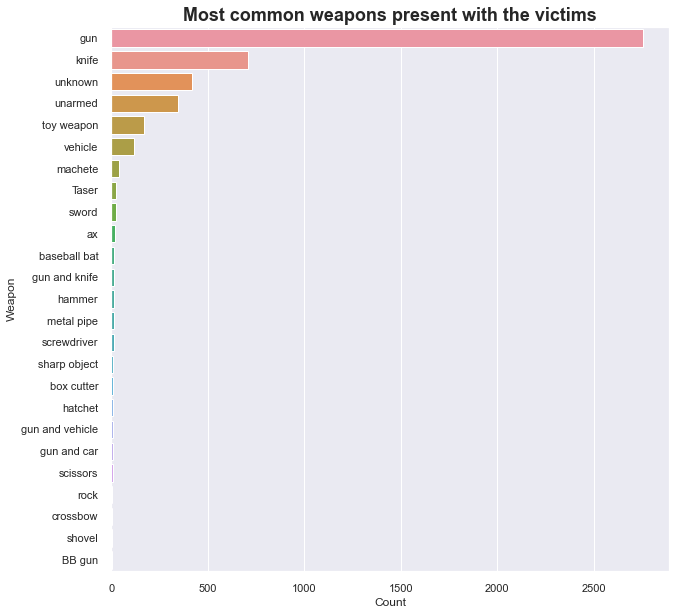

In [22]:
data = df['armed'].value_counts().reset_index().head(25)
data.columns = ['Weapon' , 'Count']

plt.figure(figsize = (10,10))
sns.barplot(x = 'Count' , y = 'Weapon' , data = data)
plt.title('Most common weapons present with the victims' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()


We can see that the most popular weapons are gun and knife but they are followed by unknown and unarmed. Lets take a deeper dive to understand this pattern.
Lets focus on the "Unarmed victims" for our next part of analysis.

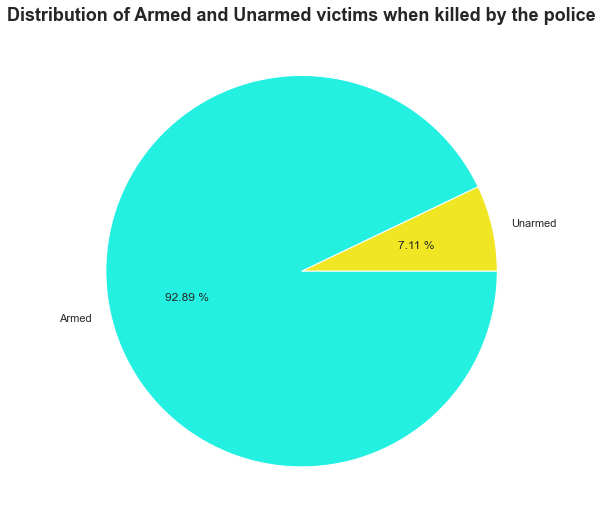

In [23]:
label = ['Unarmed','Armed']
ar = []
op = df[df.armed == 'unarmed']
ar.append(op.shape[0])
ar.append(df.shape[0]-ar[0])
colors = ['#f0e624','#24f0e2']
fig = plt.figure(figsize=(9,9))
plt.pie(ar,labels=label,autopct='%.2f %%',colors = colors)
plt.title("Distribution of Armed and Unarmed victims when killed by the police" , 
          fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

In 7% of the total police shootings after 2015, the victim was unarmed. It is hard to comprehend the fact that the police to shoot someone who was unarmed. It could have been prevented for sure.Let's look at the racial distribution of the unarmed victims. 

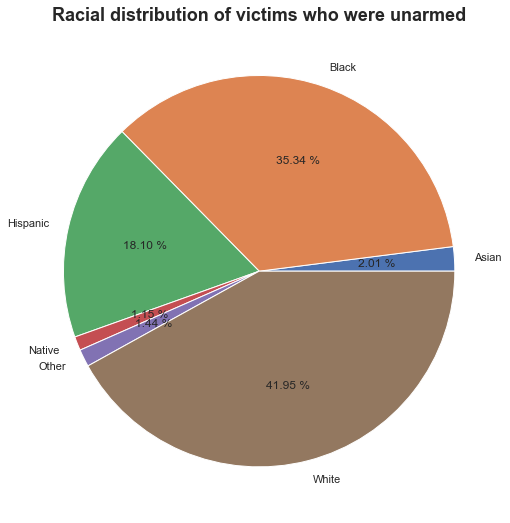

In [24]:
label = np.unique(df.race)
arr = []
for i in label:
    op = df[df.armed == 'unarmed']
    op = op[op.race == i]
    arr.append(op.shape[0])
fig = plt.figure(figsize=(9 ,9))
plt.pie(arr,labels = label,autopct = '%.2f %%')
plt.title("Racial distribution of victims who were unarmed" , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()  

This chart reveals that more than 35% of the victims were black. This definitely shows hints of racism since the percentage of black people has increased even more in case of the victim being unarmed.

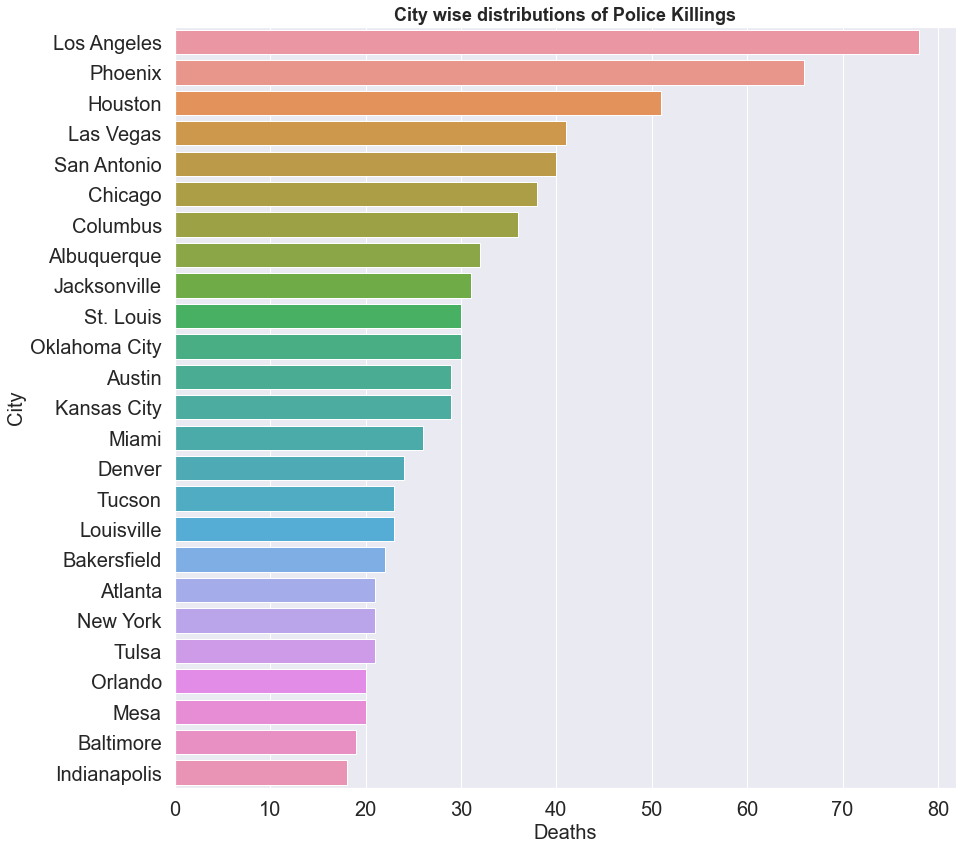

In [25]:
data = df.city.value_counts().reset_index().rename(columns={'index':'city', 'city' : 'deaths'}).head(25)
plt.figure(figsize = (14,14))
sns.barplot(x = 'deaths' , y = 'city' , data = data)
plt.title('City wise distributions of Police Killings' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.xlabel("Deaths",fontsize=20)
plt.ylabel("City",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [26]:
data = df.threat_level.value_counts()
data

attack          3160
other           1528
undetermined     207
Name: threat_level, dtype: int64

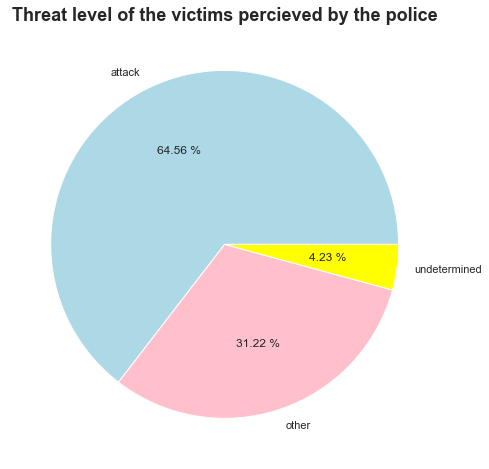

In [27]:
plt.figure(figsize = (8,8))
colors = ['lightblue' , 'pink' , 'yellow']
plt.pie(data ,  autopct = '%.2f %%' , labels = ['attack' , 'other', 'undetermined'] , colors = colors)
plt.title('Threat level of the victims percieved by the police' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

'Undetermined' and 'other' are pretty vague descriptions of the threat level posed by the victims. This does not paint a clear picture at all but we have to take the word of the police for it.

In [28]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015


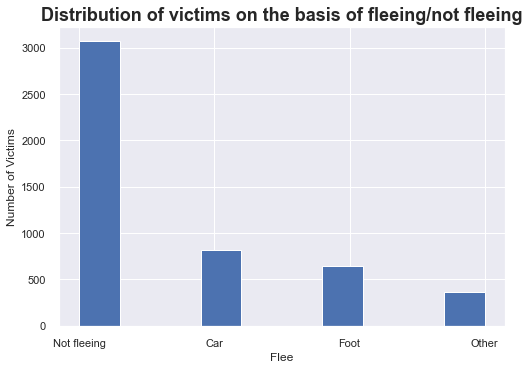

In [29]:
plt.hist(df.flee)
plt.title('Distribution of victims on the basis of fleeing/not fleeing' , 
          fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.xlabel('Flee')
plt.ylabel('Number of Victims')
plt.show()

Most of the victims fall in the not fleeing category. If they were not even trying to run away, was it really necessary to shoot? 

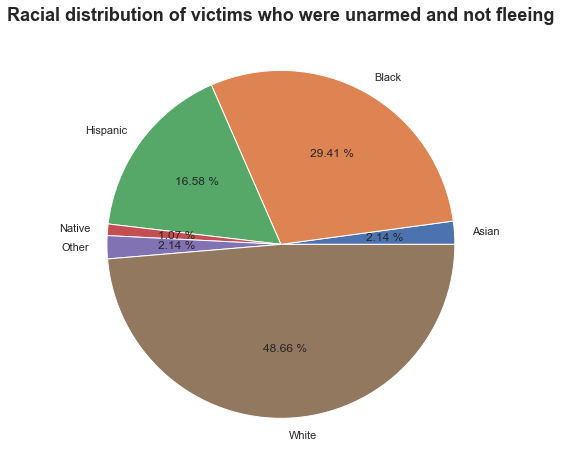

In [30]:
labels = np.unique(df.race)
arr=[]
for i in labels:
    op = df.loc[(df['armed'] == 'unarmed') & (df['flee'] == 'Not fleeing')]
    op = op[op.race == i]
    arr.append(op.shape[0])
plt.figure(figsize = (8,8))
plt.pie(arr , labels =labels , autopct = '%.2f %%')
plt.title("Racial distribution of victims who were unarmed and not fleeing" , 
          fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()


This entire pie-chart represents cold-blooded murder(by the police) according to my opinion. The victim was unarmed and not even trying to run away. What possible explanation can the police provide for these shootings. How can someone feel safe in their own country if crimes like these keep happening. Also, a whopping 30% of the victims are from the black community which again shows racial bias. 

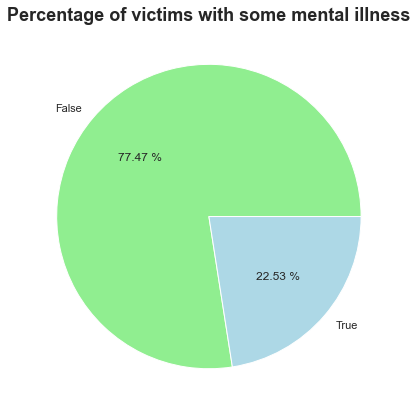

In [31]:
plt.figure(figsize = (7,7))
plt.pie(df.signs_of_mental_illness.value_counts() , autopct = '%.2f %%' , colors = ['lightgreen','lightblue'],
       labels = [ 'False','True' ])
plt.title('Percentage of victims with some mental illness' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

Around 22.5% of the victims showed some mental illness 

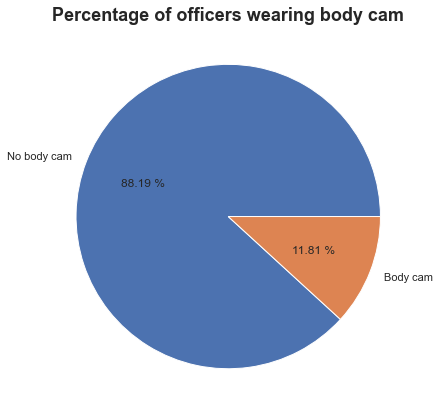

In [32]:
fig = plt.figure(figsize=(7,7))
plt.pie(df.body_camera.value_counts(),autopct = '%.2f %%',labels = ['No body cam', 'Body cam'])
plt.title("Percentage of officers wearing body cam", 
          fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

Only a miniscule 12% of Officers were wearing a body cam in these cases.